In [1]:
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
import pandas as pd
id_time_vitals_train=pd.read_csv("id_time_vitals_train.csv")
id_time_labs_train=pd.read_csv("id_time_labs_train.csv")
id_label_train=pd.read_csv("id_label_train.csv")
id_age_train=pd.read_csv("id_age_train.csv")

In [ ]:
id_time_vitals_train

In [4]:
id_age_label_train=id_age_train.merge(id_label_train)
id_time_labs_vitals_train=id_time_labs_train.merge(id_time_vitals_train)
id_time_labs_vitals_train_fill=id_time_labs_vitals_train.fillna(method='ffill')
id_time_labs_vitals_train_fill.head()

,ID,TIME,L1,L2,L3,L4,L5,L6,L7,L8,...,L23,L24,L25,V1,V2,V3,V4,V5,V6,ICU
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,86,49,70,NaN,87,NaN,0
1,1,4320,6.60759,114.044116,128.393872,NaN,NaN,11.327002,NaN,NaN,...,NaN,NaN,NaN,86,49,70,NaN,87,NaN,0
2,1,5646,6.60759,114.044116,128.393872,NaN,NaN,11.327002,NaN,NaN,...,NaN,NaN,NaN,91,58,70,NaN,87,96.6,1
3,1,5703,6.60759,114.044116,128.393872,NaN,NaN,11.327002,NaN,NaN,...,NaN,NaN,NaN,140,73,91,32,87,96.6,1
4,1,6342,6.60759,114.044116,128.393872,NaN,NaN,11.327002,NaN,NaN,...,NaN,NaN,NaN,139,90,107,29,101,96.6,1


In [5]:
id_time_labs_vitals_train_fill['ID'].astype("int")


0            1
1            1
2            1
3            1
4            1
5            1
6            1
7            1
8            1
9            1
10           1
11           1
12           1
13           1
14           1
15           1
16           1
17           1
18           1
19           1
20           1
21           1
22           1
23           1
24           1
25           1
26           1
27           1
28           1
29           1
          ... 
628407    3594
628408    3594
628409    3594
628410    3594
628411    3594
628412    3594
628413    3594
628414    3594
628415    3594
628416    3594
628417    3594
628418    3594
628419    3594
628420    3594
628421    3594
628422    3594
628423    3594
628424    3594
628425    3594
628426    3594
628427    3594
628428    3594
628429    3594
628430    3594
628431    3594
628432    3594
628433    3594
628434    3594
628435    3594
628436    3594
Name: ID, dtype: int64

In [6]:
merged=id_time_labs_vitals_train_fill.merge(id_age_label_train)


In [7]:
merged2=merged[['ID', 'TIME', 'AGE', 'ICU']]
merged2['V6_clean']=merged['V6'].apply(lambda x: x if (x>80 or x<112) else np.nan )
merged2['V5_clean']=merged['V5'].apply(lambda x: 100 if x>100 else x if x>0 else np.nan )
merged2['V4_clean']=merged['V4'].apply(lambda x: x if (x>5 or x<60) else np.nan )
merged2['V3_clean']=merged['V3'].apply(lambda x: x if (x>30 and x<220) else np.nan )
merged2['V2_clean']=merged['V2'].apply(lambda x: x if (x>15 and x<200) else np.nan )
merged2['V1_clean']=merged['V1'].apply(lambda x: x if (x>30 and x<300) else np.nan )
merged2['L1_clean']=merged['L1'].apply(lambda x: x if (x>0 and x<14) else np.nan)
merged2['L2_clean']=merged['L2'].apply(lambda x: 132 if x>132 else x if x>0 else np.nan )
merged2[['L3_clean', 'L4_clean', 'L5_clean', 'L6_clean']]=merged[['L3','L4','L5','L6']].applymap(lambda x: x if x>0 else np.nan )
merged2['L7_clean']=merged['L7'].apply(lambda x: x if x<700 else 700 if x>700 else np.nan)
merged2['L8_clean']=merged['L8'].apply(lambda x: x if x<200 else 200 if x>200 else np.nan)
merged2['L9_clean']=merged['L9'].apply(lambda x: x if x<100 else x/1000)
merged2['L10_clean']=merged['L10'].apply(lambda x: x if (x>0 and x<100) else np.nan)
merged2['L11_clean']=merged['L11'].apply(lambda x: x if (x>0 and x<2000) else 2000 if x>2000 else np.nan)
merged2['L12_clean']=merged['L12'].apply(lambda x: x if x<5 else 5+(x-5)/10)
merged2['L13_clean']=merged['L13'].apply(lambda x: x if x>0 else np.nan)
merged2['L14_clean']=merged['L14'].apply(lambda x: x if x>0 else np.nan)
merged2['L15_clean']=merged['L15'].apply(lambda x: x if (x>0 and x<20) else 20 if x>20 else np.nan)
merged2['L16_clean']=merged['L16']
merged2['L17_clean']=merged['L17']
merged2['L18_clean']=merged['L18']
merged2['L19_clean']=merged['L19']
merged2['L20_clean']=merged['L20']
merged2['L21_clean']=merged['L21']
merged2['L22_clean']=merged['L22']
merged2['L23_clean']=merged['L23']
merged2['L24_clean']=merged['L24']
merged2['L25_clean']=merged['L25']

merged2['LABEL']=merged['LABEL']


/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [8]:
merged2[merged2['ID']==1]

,ID,TIME,AGE,ICU,V6_clean,V5_clean,V4_clean,V3_clean,V2_clean,V1_clean,...,L17_clean,L18_clean,L19_clean,L20_clean,L21_clean,L22_clean,L23_clean,L24_clean,L25_clean,LABEL
0,1,0,42,0,NaN,87,NaN,70,49,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,4320,42,0,NaN,87,NaN,70,49,86,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
2,1,5646,42,1,96.6,87,NaN,70,58,91,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
3,1,5703,42,1,96.6,87,32,91,73,140,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
4,1,6342,42,1,96.6,100,29,107,90,139,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
5,1,6609,42,1,96.6,100,30,109,75,152,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
6,1,6894,42,1,96.6,98,30,84,79,140,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
7,1,6957,42,1,96.6,100,31,108,72,140,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
8,1,7511,42,1,95.2,95,31,110,68,132,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1
9,1,8372,42,1,95.2,97,31,106,70,139,...,NaN,NaN,NaN,100.206288,NaN,NaN,NaN,NaN,NaN,1


merged2.std()

In [9]:
print pd.crosstab(merged2['LABEL'], merged2['L7_clean'], rownames=['LABEL'])

L7_clean  0.000316    0.004348    0.006199    0.009193    0.013364    \
LABEL                                                                  
0                  3           9           3           7           4   
1                  0           0           0           0           0   

L7_clean  0.016336    0.020299    0.027484    0.027711    0.029871    \
LABEL                                                                  
0                 12          46           1          13          21   
1                  0           0           0           0           0   

L7_clean     ...      514.429276  519.028562  521.892146  550.861511  \
LABEL        ...                                                       
0            ...              11          11           1           0   
1            ...               0           0           0           5   

L7_clean  566.584530  613.547645  631.628539  656.880056  684.445242  \
LABEL                                                        

In [10]:
print pd.crosstab(merged2['LABEL'], merged2['L13_clean'], rownames=['LABEL'])

L13_clean  44.673867    60.639727    64.994801    75.784165    133.748212   \
LABEL                                                                        
0                13863          222         1122         8155            1   
1                    0            0            0            0            0   

L13_clean  141.192815   323.988578   415.060996   443.771462   503.210255   \
LABEL                                                                        
0                   13         1329          111          890        14600   
1                    0            0            0            0            0   

L13_clean     ...       2470.055639  2731.228230  2816.645350  3012.232227  \
LABEL         ...                                                            
0             ...             43433         1430        23640         8431   
1             ...             24422        13101            0            0   

L13_clean  3042.999315  3070.629681  3137.993927  3142.367145

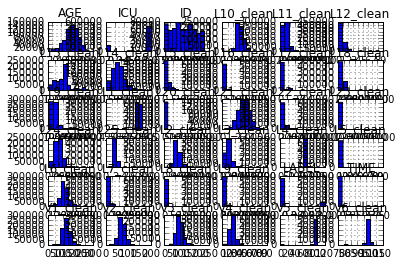

In [11]:
%matplotlib inline
merged2.hist()
pl.show()

In [12]:
merged2=merged2.replace([np.inf, -np.inf], np.nan)
merged2=merged2.fillna(merged2.mean())


In [13]:
merged2.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
628407    False
628408    False
628409    False
628410    False
628411    False
628412    False
628413    False
628414    False
628415    False
628416    False
628417    False
628418    False
628419    False
628420    False
628421    False
628422    False
628423    False
628424    False
628425    False
628426    False
628427    False
628428    False
628429    False
628430    False
628431    False
628432    False
628433    False
628434    False
628435    False
628436    False
dtype: bool

In [14]:
train_cols = merged2.columns[2:-1]

logit = sm.Logit(merged2['LABEL'], merged2[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.210435
         Iterations 8


In [15]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  LABEL   No. Observations:               628437
Model:                          Logit   Df Residuals:                   628404
Method:                           MLE   Df Model:                           32
Date:                Fri, 23 Oct 2015   Pseudo R-squ.:                  0.4161
Time:                        14:00:05   Log-Likelihood:            -1.3225e+05
converged:                       True   LL-Null:                   -2.2650e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AGE            0.0220      0.000     58.353      0.000         0.021     0.023
ICU            1.2739      0.021     61.249      0.000         1.233     1.315
V6_clean      -0.0807      0.002    -34.460      0.0

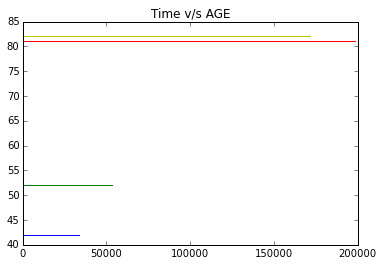

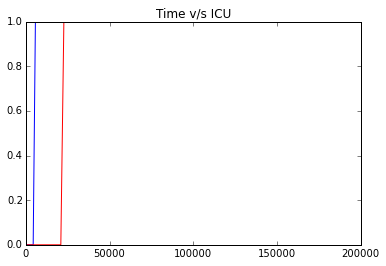

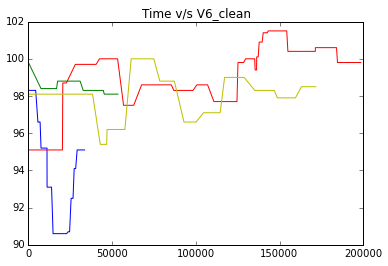

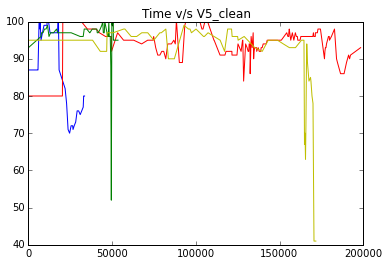

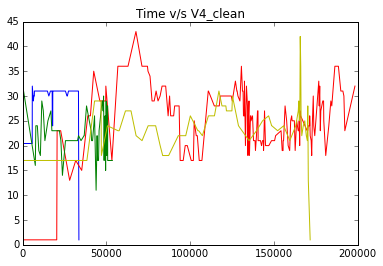

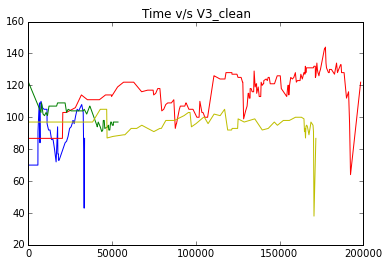

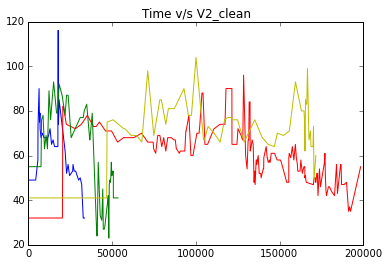

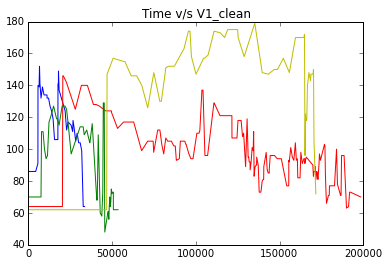

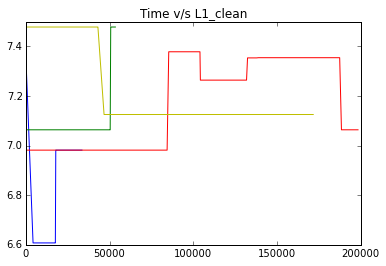

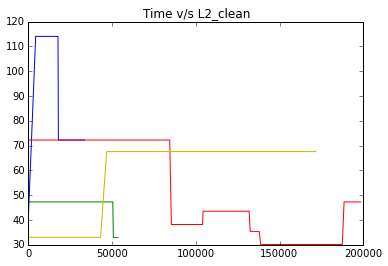

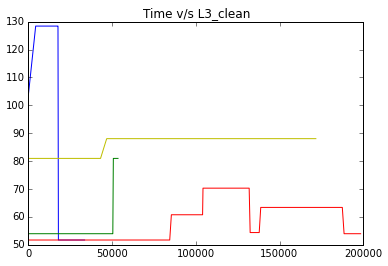

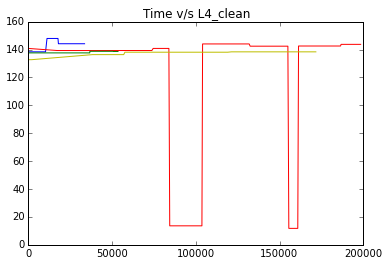

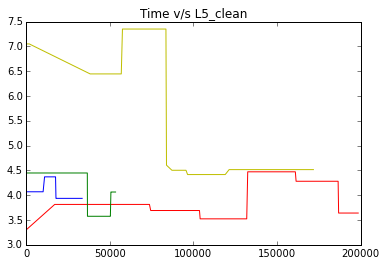

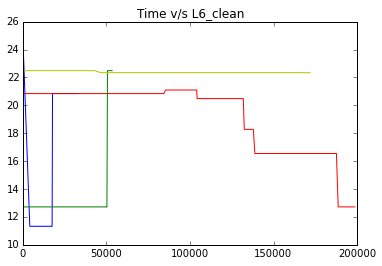

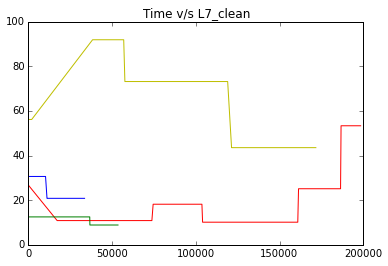

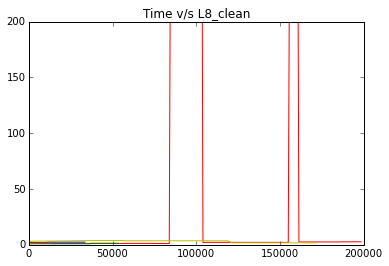

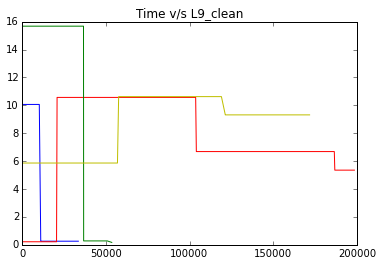

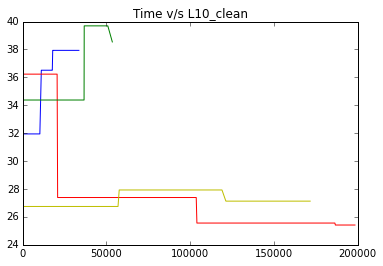

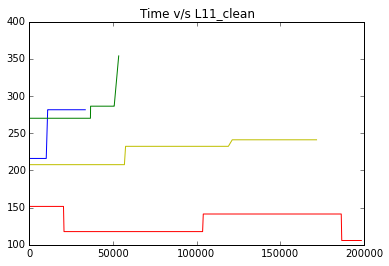

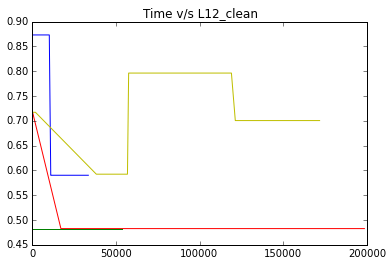

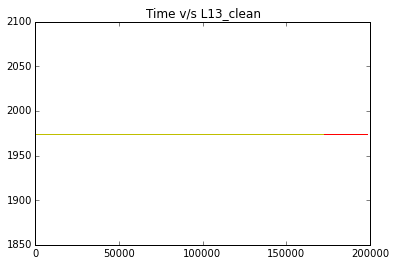

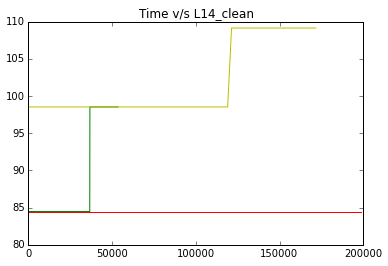

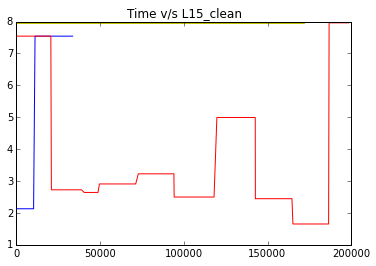

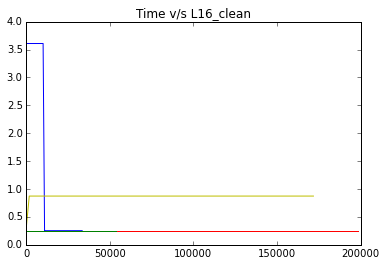

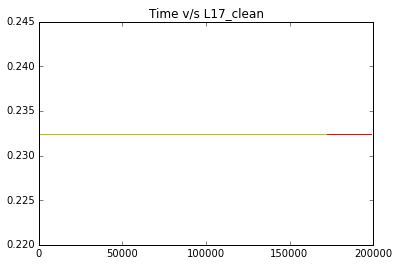

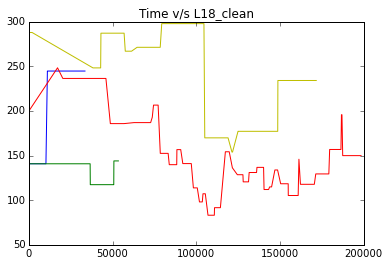

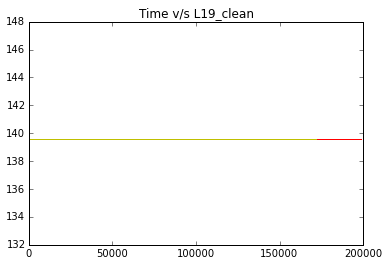

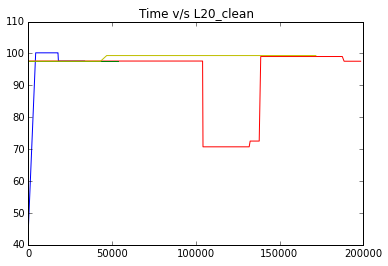

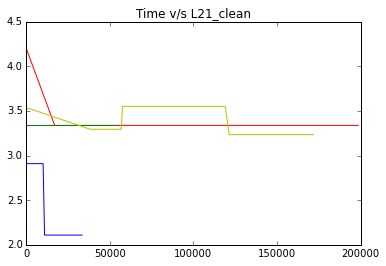

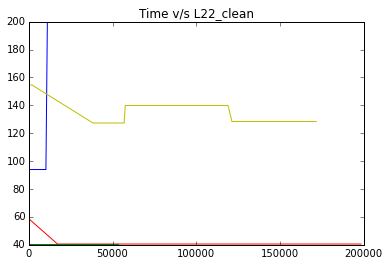

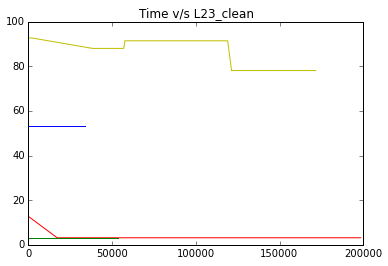

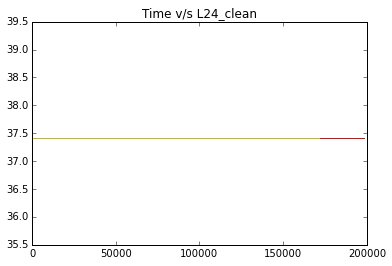

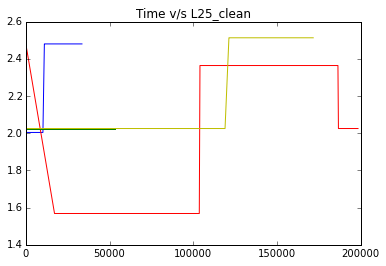

In [16]:
for c in merged2.columns[2:-1]:
    pl.plot(merged2[merged2['ID']==1]['TIME'].values, merged2[merged2['ID']==1][c].values, 'b-')
    pl.plot(merged2[merged2['ID']==2]['TIME'].values, merged2[merged2['ID']==2][c].values, 'r-')
    pl.plot(merged2[merged2['ID']==3]['TIME'].values, merged2[merged2['ID']==3][c].values, 'g-')
    pl.plot(merged2[merged2['ID']==4]['TIME'].values, merged2[merged2['ID']==4][c].values, 'y-')

    pl.title("Time v/s "+str(c))
    pl.show()

In [17]:
merged2_id=merged2.groupby('ID')


In [18]:
first_values=merged2_id.apply(lambda x: x.iloc[0,:]).drop(['ID','TIME', 'LABEL'], axis=1).add_suffix("_first_values")
last_values=merged2_id.apply(lambda x: x.iloc[-1,:]).drop(['ID','TIME', 'AGE', 'ICU', 'LABEL'], axis=1).add_suffix("_last_values")
min_values=merged2_id.apply(np.min).drop(['ID','TIME', 'AGE', 'ICU', 'LABEL'], axis=1).add_suffix("_min_values")
max_values=merged2_id.apply(np.max).drop(['ID','TIME', 'AGE', 'ICU', 'LABEL'], axis=1).add_suffix("_max_values")
total_time=merged2_id.apply(lambda x: x['TIME'].iloc[-1]-x['TIME'].iloc[0])
mean=merged2_id.apply(np.mean).drop(['ID','TIME', 'AGE', 'ICU', 'LABEL'], axis=1).add_suffix("_mean")
difference=merged2_id.apply(lambda x: (x.iloc[-1,:]-x.iloc[0,:])/float(x['TIME'].iloc[-1]-x['TIME'].iloc[0])).drop(['ID','TIME', 'AGE', 'ICU', 'LABEL'], axis=1).add_suffix("_difference")

In [19]:
merged3=first_values.merge(last_values, left_index=True, right_index=True)
merged3=merged3.merge(min_values,left_index=True, right_index=True)
merged3=merged3.merge(max_values, left_index=True, right_index=True)
merged3['total_time']=total_time
merged3=merged3.merge(mean, left_index=True, right_index=True)
merged3=merged3.merge(difference,left_index=True, right_index=True)



In [21]:
merged3=merged3.fillna(value=0)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, step=10, verbose = 1)
selector = selector.fit(merged3.values, id_label_train['LABEL'].tolist())
print 'here'
selector.support_ 

Fitting estimator with 189 features.
Fitting estimator with 179 features.
Fitting estimator with 169 features.
Fitting estimator with 159 features.

In [ ]:
print "DONE"